<a href="https://colab.research.google.com/github/GalynaDe/ML/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [4]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/ML course 2024/HW 2.1/cars.csv")
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [5]:
# Виводимо типи даних колонок
print("Типи даних колонок:")
print(df.dtypes)

Типи даних колонок:
Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object


In [6]:
# Аналізуємо типи даних в кожній колонці
print("\nКількість унікальних значень в кожній категоріальній колонці:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].nunique()} унікальних значень")
        print(f"Унікальні значення: {df[col].unique()}")
    else:
        print(f"{col}: числова колонка")



Кількість унікальних значень в кожній категоріальній колонці:
Car_ID: числова колонка
Brand: 11 унікальних значень
Унікальні значення: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Model: 58 унікальних значень
Унікальні значення: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']
Year: числова колонка
Kilometers_Driven: числова колонка
Fuel_Type: 2 унікальних значень
Унікальні значення: ['Petrol' 'Diesel']
Transmission: 2 унікальних значень
Унікальні значення: ['Manual' 'Automatic']
Owner_Type: 3 унікал

In [7]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Price']), df['Price'], test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [13]:
fuel_type_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Type_Code'] = X_train.Fuel_Type.map(fuel_type_codes)
X_test['Fuel_Type_Code'] = X_test.Fuel_Type.map(fuel_type_codes)

transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_Code'] = X_train.Transmission.map(transmission_codes)
X_test['Transmission_Code'] = X_test.Transmission.map(transmission_codes)

In [14]:
from sklearn.preprocessing import OneHotEncoder

ohe_columns = ['Brand']
ohenc = OneHotEncoder()
ohenc.fit(X_train[ohe_columns])

one_hot = ohenc.transform(X_train[ohe_columns]).toarray()
X_train[ohenc.categories_[0]] = one_hot

one_hot = ohenc.transform(X_test[ohe_columns]).toarray()
X_test[ohenc.categories_[0]] = one_hot

In [15]:
ohenc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [16]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [17]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

<Axes: >

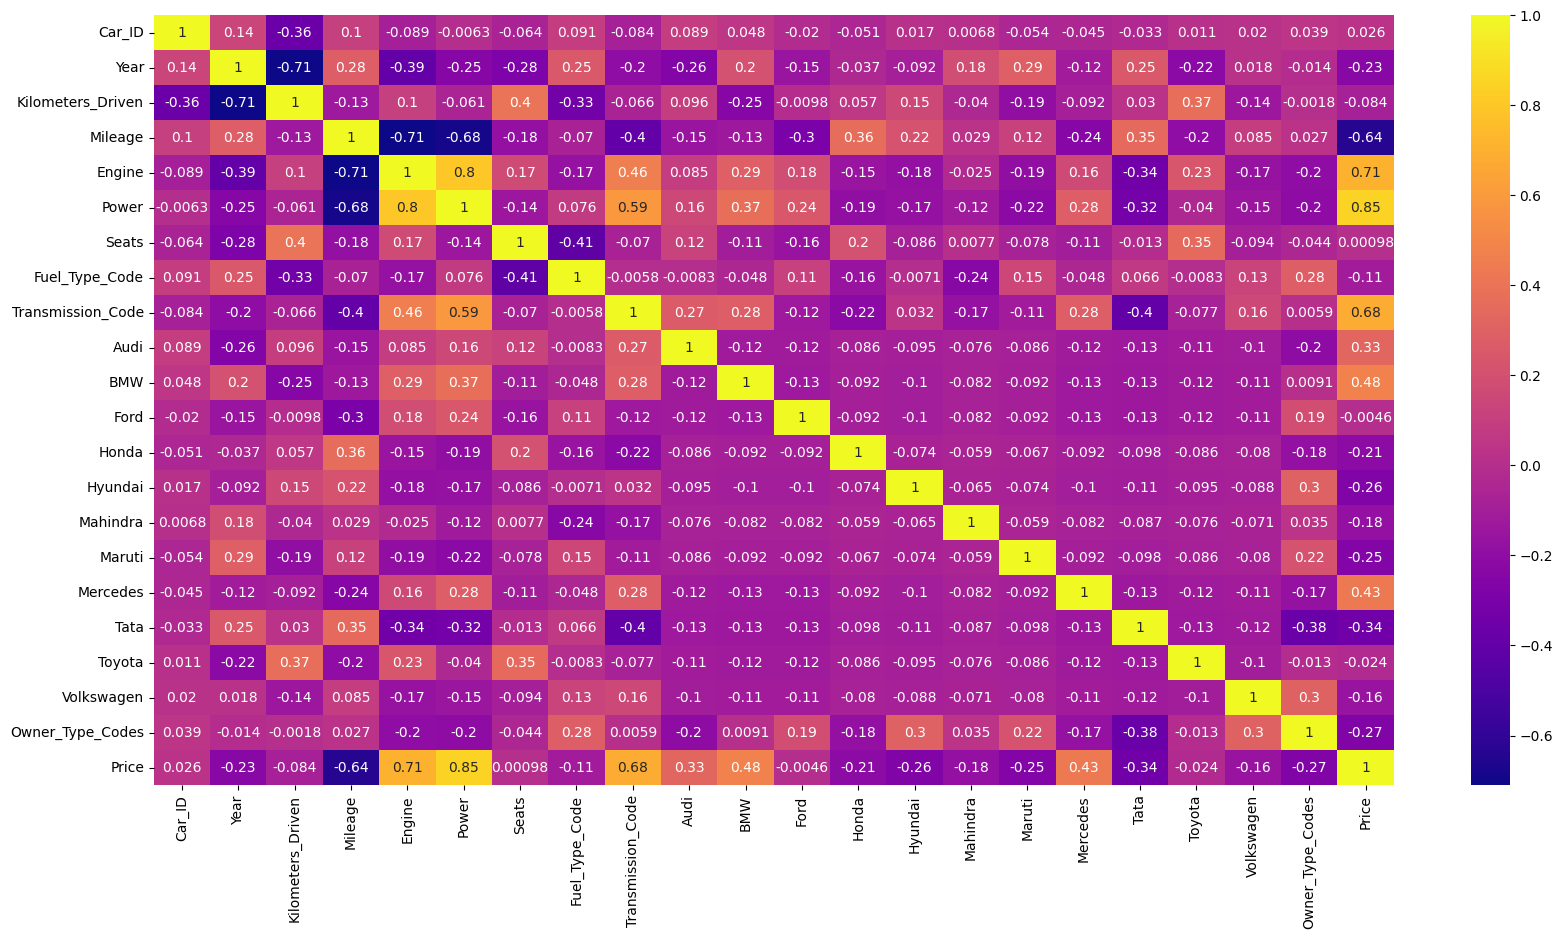

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
dff = pd.concat([X_train.select_dtypes('number'), y_train], axis=1)
plt.figure(figsize=(20,10))
sns.heatmap(dff.corr(), annot=True, cmap="plasma")



In [20]:
dff.corr()['Price'].sort_values()

,Price
Mileage,-0.638404
Tata,-0.341815
Owner_Type_Codes,-0.265537
Hyundai,-0.263022
Maruti,-0.249737
Year,-0.233769
Honda,-0.209779
Mahindra,-0.178627
Volkswagen,-0.158742
Fuel_Type_Code,-0.110782


Найбільше з Price корелюють Power, Engine, Transmission_Code, Mileage.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [21]:
X_train.drop(columns=X_train.select_dtypes('object').columns, inplace=True)
X_test.drop(columns=X_test.select_dtypes('object').columns, inplace=True)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression().fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_loss = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_loss = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Помилка моделі на тренувальному наборі даних: {round(train_loss, 2)}')
print(f'Помилка моделі на тестувальному наборі даних: {round(test_loss, 2)}')




Помилка моделі на тренувальному наборі даних: 210293.58
Помилка моделі на тестувальному наборі даних: 258181.56


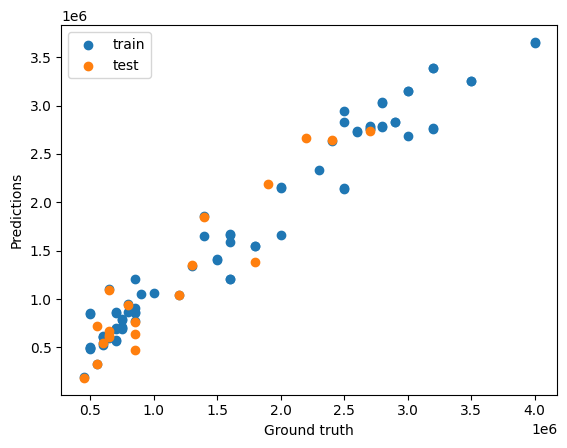

In [23]:
plt.scatter(y_train, y_train_pred, label='train')
plt.scatter(y_test, y_test_pred, label='test')
plt.xlabel('Ground truth')
plt.ylabel('Predictions')
plt.legend()

In [24]:
df.Price.describe().round(1)

,Price
count,100.0
mean,1574000.0
std,1000264.6
min,450000.0
25%,700000.0
50%,1300000.0
75%,2500000.0
max,4000000.0


 Виходячи з середнього значення та розкиду даних модель достатньо хороша, так як передбачення і реальні дані образуюють діагональ на графіку розсіювання, також медіана значно менша  помилки моделі, а стандартне відхилення значно більше.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [26]:
X_train_scaled.describe().round(2)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
count,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00
mean,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-1.85,-2.11,-2.00,-2.07,-1.32,-1.21,-1.65,-1.03,-1.26,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,-0.99
25%,-0.79,-0.32,-0.69,-0.60,-0.64,-0.78,-0.30,-1.03,-1.26,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,-0.99
50%,0.01,-0.32,-0.04,-0.02,0.06,-0.16,-0.30,0.98,0.80,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,0.54
75%,0.85,0.57,0.48,0.57,0.42,0.30,-0.30,0.98,0.80,-0.33,-0.36,-0.36,-0.26,-0.28,-0.23,-0.26,-0.36,-0.38,-0.33,-0.31,0.54
max,1.66,2.35,3.45,2.33,4.63,2.81,2.39,0.98,0.80,3.00,2.81,2.81,3.87,3.51,4.36,3.87,2.81,2.65,3.00,3.23,2.06


In [27]:
type(X_train_scaled), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

model = LinearRegression().fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_loss = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_loss = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Помилка моделі на тренувальному наборі даних: {round(train_loss, 2)}')
print(f'Помилка моделі на тестувальному наборі даних: {round(test_loss, 2)}')


Помилка моделі на тренувальному наборі даних: 210293.58
Помилка моделі на тестувальному наборі даних: 258181.56


In [38]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight').round(2)

,feature,weight
7,Fuel_Type_Code,-183848.02
13,Hyundai,-152304.86
14,Mahindra,-140945.16
3,Mileage,-131715.51
11,Ford,-118209.45
15,Maruti,-112259.97
2,Kilometers_Driven,-94398.72
19,Volkswagen,-92968.26
17,Tata,-65996.25
12,Honda,-62753.01


Найбільш важливі ознаки - Power, деквлька марок авто,Transmission_Code, OwnerTypeCode.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [39]:
import statsmodels.api as sm

X = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train.values, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           2.01e-33
Time:                        17:22:54   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+0

Для визначення статистично значущих ознак на рівні 0.05, порівнюємо значення P>|t| в таблиці. Якщо значення P>|t| менше 0.05, то відповідна ознака є статистично значущою.

Основні статистично значущі ознаки:

  Power (P>|t| = 0.000)

  Fuel_Type_Code (P>|t| = 0.000)

  Audi (P>|t| = 0.000)

  BMW (P>|t| = 0.000)

  Hyundai (P>|t| = 0.000)

  Mahindra (P>|t| = 0.000)

  Maruti (P>|t| = 0.000)

  Ford (P>|t| = 0.001

  Transmission_Code (P>|t| = 0.010)

  Mileage (P>|t| = 0.028)

  Volkswagen (P>|t| = 0.003)


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [40]:
significant_features = [
    "Mileage",
    "Power",
    "Fuel_Type_Code",
    "Transmission_Code",
    "Audi",
    "BMW",
    "Ford",
    "Hyundai",
    "Mahindra",
    "Maruti",
    "Volkswagen"
]
X = sm.add_constant(X_train_scaled[significant_features])
model = sm.OLS(y_train.values, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     62.90
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           3.20e-31
Time:                        17:29:31   Log-Likelihood:                -1124.9
No. Observations:                  80   AIC:                             2274.
Df Residuals:                      68   BIC:                             2302.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   3.75e+0

Значення R2 сильно змінилось. Треба спробувати видалити не так багато даних з моделі.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [41]:
delete = ['Car_ID', 'Year', 'Seats', 'Toyota', 'Engine', 'Owner_Type_Codes']
X = sm.add_constant(X_train_scaled.drop(columns = delete))
model = sm.OLS(y_train.values, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Mon, 06 Jan 2025   Prob (F-statistic):           4.85e-38
Time:                        17:32:42   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

Всі ознаки являються статистично значущими. Їх кількість зменшилась, покаазники AIC/BIC покращились. Цю модель можна залишити для використання.